# Unit 5 - Financial Planning

In [125]:
# The following is a script to do the following:
# 1. 
# 2.
# 3.
# 4. 

In [126]:
#Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import datetime as dt
import json
from pathlib import Path

%matplotlib inline

In [127]:
#Load the .env enviroment variable with API keys
load_dotenv("MY_KEYS.env")

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [128]:
#Set the current amount of crypto assets assumed to be in each union member's portfolio
my_btc = 1.2
my_eth = 5.3

In [129]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/"

In [130]:
# Fetch current BTC price
btc_response_data = requests.get(btc_url).json()

# Fetch current ETH price
eth_response_data = requests.get(eth_url).json()

print(json.dumps([btc_response_data,eth_response_data], indent=4))

[
    {
        "data": {
            "1": {
                "id": 1,
                "name": "Bitcoin",
                "symbol": "BTC",
                "website_slug": "bitcoin",
                "rank": 1,
                "circulating_supply": 18856487,
                "total_supply": 18856487,
                "max_supply": 21000000,
                "quotes": {
                    "USD": {
                        "price": 59245.0,
                        "volume_24h": 45278983711,
                        "market_cap": 1117233267875,
                        "percentage_change_1h": 0.400335972956839,
                        "percentage_change_24h": -2.6576544859128,
                        "percentage_change_7d": -10.5569247031251,
                        "percent_change_1h": 0.400335972956839,
                        "percent_change_24h": -2.6576544859128,
                        "percent_change_7d": -10.5569247031251
                    }
                },
                "last_upda

In [131]:
#Compute the current value of the cryptocurrency holdings
btc_holdings_value = btc_response_data["data"]["1"]["quotes"]["USD"]["price"] * my_btc
eth_holdings_value = eth_response_data["data"]["1027"]["quotes"]["USD"]["price"] * my_eth

#Print the current balance of the cryptocurrency holdings
print(f"The current value of your {my_btc} BTC is ${btc_holdings_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${eth_holdings_value:0.2f}")

The current value of your 1.2 BTC is $71094.00
The current value of your 5.3 ETH is $21310.45


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [132]:
#Set the current amount of shares of stocks and bonds assumed to be in each union member's portfolio
my_agg = 200
my_spy = 50

In [133]:
#Set the Alpaca API key and secret from the .env file
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

#Create the Alpaca API object to communicate the keys
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [134]:
#Set the start date of the data request to "today" using Datetime library which puts it in ISO format
start_date = dt.date.today()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

#Get the current closing prices for SPY and AGG, using a limit of 1000 to get the last 1000 days worth of data
stocks_bonds_df = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    limit=1000,
).df

#Preview the historical price data in the dataframe
stocks_bonds_df.tail()

AGG                                       \
                             open      high       low   close   volume   
time                                                                     
2021-10-21 00:00:00-04:00  114.01  114.0400  113.8423  113.85  4741154   
2021-10-22 00:00:00-04:00  113.97  114.1399  113.8950  114.07  3309637   
2021-10-25 00:00:00-04:00  114.06  114.2700  114.0600  114.17  7088133   
2021-10-26 00:00:00-04:00  114.25  114.3800  114.1100  114.37  5284755   
2021-10-27 00:00:00-04:00  114.66  114.9150  114.4250  114.77  6817074   

                              SPY                                     
                             open     high     low   close    volume  
time                                                                  
2021-10-21 00:00:00-04:00  451.76  453.829  451.31  453.61  33945007  
2021-10-22 00:00:00-04:00  453.13  454.670  451.05  453.13  50771701  
2021-10-25 00:00:00-04:00  454.28  455.900  452.39  455.48  37918548  
2021-10-26 00:00:00-04:00  457.20  458.490  455.56  455.97  49865704  
2021-10-27 00:00:00-04:00  456.45  457.160  453.86  453.92  48219255

In [135]:
#Pull out the current close prices of AGG and SPY
#Since this code may be executed prior to the market opening on a certain day, the code cannot be written using .loc[] using the date "today" because only yesterday's data would be available
#The .loc[] function does not have a simple way to pull out the last row, so here the index is reset to integers so that the .iloc[] function can be used to set the variables for prices, and then the date/time is set as the index once again

spy_close_price = stocks_bonds_df["SPY"]["close"][-1]    
agg_close_price = stocks_bonds_df["AGG"]["close"][-1]   

#Print the current AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.77
Current SPY closing price: $453.92


In [136]:
#Compute the current value of the stocks and bonds in the portfolio by using the current close price
my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg

#Print current value of the stocks and bonds in the portfolio
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $22696.00
The current value of your 200 AGG shares is $22954.00


### Savings Health Analysis

In [137]:
#Set the monthly household income of each credit union member
monthly_income = 12000

#Consolidate the financial assets data into a dictionary
assets = {
    "Crypto" : (btc_holdings_value + eth_holdings_value),
    "Shares" : (my_spy_value + my_agg_value),
}

#Create a savings DataFrame with the combined assets
df_savings = pd.DataFrame(assets, index=["Amount"]).transpose()

#Display the savings DataFrame for viewing
df_savings

,Amount
Crypto,92404.452
Shares,45650.000


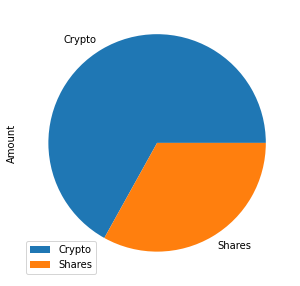

In [138]:
#Plot the savings breakdown in a pie chart
df_savings.plot(kind="pie", y="Amount", figsize = (5,5)).legend(loc="lower left")

In [139]:
#Set the ideal emergency fund equal to 3 months income
emergency_fund = monthly_income * 3

#Calculate current total amount of savings by adding the total current value of crypto and shares
total_savings= df_savings.sum()[0]

#Validate saving health
if total_savings > emergency_fund:
    print("Awesome job! You currently have more than enough money for a proper emergency fund.")
elif total_savings == emergency_fund:
    print("Congratulations on reaching the finanical goal of having a proper emergency fund!")
else:
    print(f"You're currently ${emergency_fund - total_savings:,.2f} away from meeting your emergency fund goal. Keep saving!")

Awesome job! You currently have more than enough money for a proper emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [274]:
#5 years worth of historical data for SPY and AGG from today is desired which equates to 252 * 5 = 1,260 days worth of data. 
#Since the limit on the amount of data to pull from Alpaca is only 1000, do two GET requests from Alpace to cover the entire timeframe.
#To do the two GET requests in the next line of data, need to set two end dates to make sure the data is covered, even if there is overlap between the two. Then convert the dates to ISO format. 

MC_end_date1 = dt.date.today()
MC_end_date2 = MC_end_date.replace(year=MC_end_date.year - 3)
MC_start_date = MC_end_date.replace(year=MC_end_date.year - 5)

converted_end_date1 = pd.Timestamp(MC_end_date1, tz='America/New_York').isoformat()
converted_end_date2 = pd.Timestamp(MC_end_date2, tz='America/New_York').isoformat()
converted_start_date = pd.Timestamp(MC_start_date, tz='America/New_York').isoformat()

In [275]:
#Get the closing prices for SPY and AGG of the last 5 years by doing two GET requests and storing them in two separate dataframes
df_stock_data1 = api.get_barset(
    tickers,
    timeframe,
    start=converted_start_date,
    end=converted_end_date1,
    limit=1000,
).df

df_stock_data2 = api.get_barset(
    tickers,
    timeframe,
    start=converted_start_date,
    end=converted_end_date2,
    limit=1000,
).df

#Send the two dataframes to csv files to be able to review and clean the data (i.e., remove the common overlapping dates from the GET requests)
df_stock_data1.to_csv(path_or_buf='Resources_for_checking/stock_data_1', sep='\t')
df_stock_data2.to_csv(path_or_buf='Resources_for_checking/stock_data_2', sep='\t')

In [276]:
#Remove the common overlapping dates ('2017-11-06' through '2018-10-26') from the noe dataframe and then combine the dataframes by appending them
df_stock_data1.drop(df_stock_data1.index[0:245],axis=0,inplace=True)

df_stock_data = df_stock_data2.append(df_stock_data1)

In [ ]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Printing the simulation input data
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

### Retirement Analysis

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [ ]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [ ]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")